<a href="https://colab.research.google.com/github/makaronaaa/DataSciencePython/blob/main/Linear_Regression_UseCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [447]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn import linear_model
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv(r'/content/sample_data/CaseStudyData.csv', encoding='utf-8')
#data


In [448]:
#print(df[df.reported_sales_yoy.isnull()])

In [449]:
data['sales_yoy_float'] = data['reported_sales_yoy'].str.strip('%').astype(float)
#df

In [450]:
df=data.dropna()
#df

<ipython-input-451-cc336655478a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period_end_dt'] = pd.to_datetime(df['period_end_dt'])


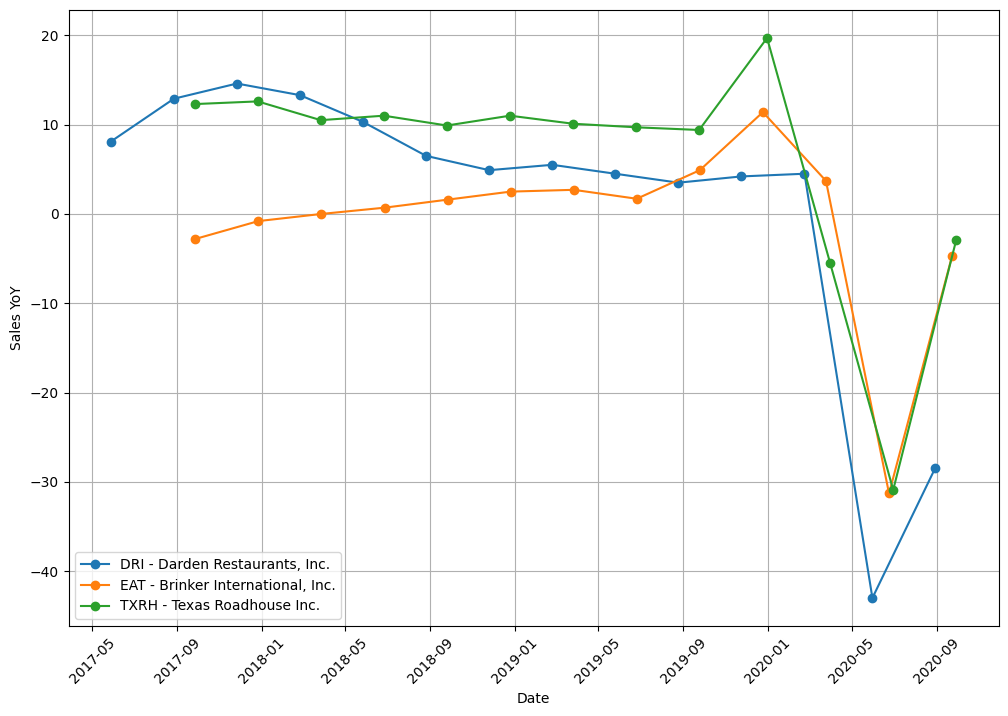

In [451]:
df['period_end_dt'] = pd.to_datetime(df['period_end_dt'])
grouped = df.groupby(['entity', 'company'])
plt.figure(figsize=(12, 8))
for (entity, company), group_data in grouped:
    plt.plot(group_data['period_end_dt'], group_data['sales_yoy_float'], marker='o', linestyle='-', label=f'{entity} - {company}')
plt.xticks(rotation=45)
plt.xlabel('Date') 
plt.ylabel('Sales YoY')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

In [452]:
df.describe()

,sales_yoy_float
count,40.00000
mean,2.19750
std,13.37927
min,-43.00000
25%,0.52500
50%,4.70000
75%,10.35000
max,19.70000


Method 1


In [453]:
df_dri = df[df['entity'] == "DRI"]
df_dri.set_index('period_end_dt', inplace=True)

In [454]:
df_dri

,entity,company,metric,reported_sales_yoy,sales_yoy_float
period_end_dt,,,,,
2017-05-28,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),8.10%,8.1
2017-08-27,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),12.90%,12.9
2017-11-26,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),14.60%,14.6
2018-02-25,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),13.30%,13.3
2018-05-27,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),10.30%,10.3
2018-08-26,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),6.50%,6.5
2018-11-25,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),4.90%,4.9
2019-02-24,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),5.50%,5.5
2019-05-26,DRI,"Darden Restaurants, Inc.",Reported Total Revenue (ex. Red Lobster),4.50%,4.5


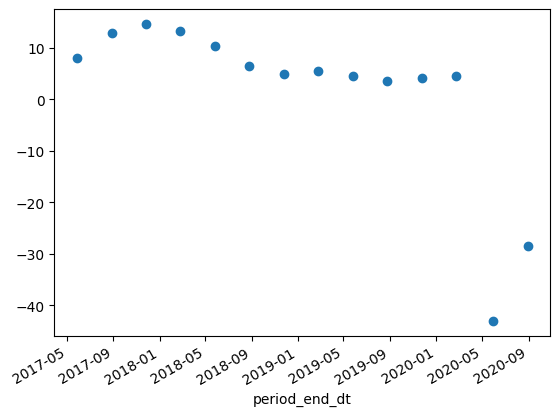

In [455]:
df_dri['sales_yoy_float'].plot(marker='o', ls='');

In [456]:
y=np.array(df_dri['sales_yoy_float'].values, dtype=float)
x=np.array(pd.to_datetime(df_dri['sales_yoy_float'].dropna()).index.values, dtype=float)

slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  -0.7207647111501863 
 p =  0.003632854176075939 
 s =  9.967519139520657e-17


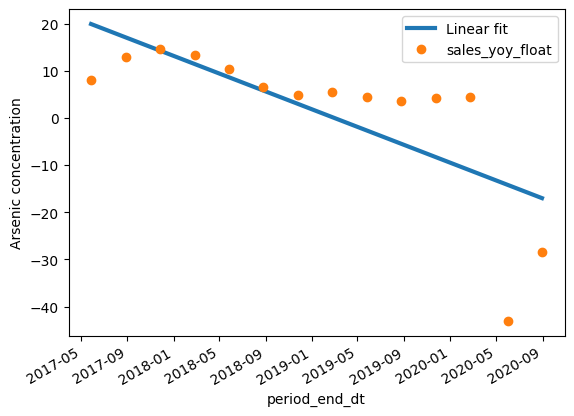

In [457]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=3)
df_dri['sales_yoy_float'].dropna().plot(ax=ax,marker='o', ls='')
plt.ylabel('Arsenic concentration')
ax.legend();

TRAIN / TEST 

In [463]:
# df=pd.read_csv(r'/content/sample_data/CaseStudyData.csv', encoding='utf-8')
#data
# df['sales_yoy_float'] = df['reported_sales_yoy'].str.strip('%').astype(float)
# df

In [459]:
X

array([[1506470400000000000],
       [1514332800000000000],
       [1522195200000000000],
       [1530057600000000000],
       [1537920000000000000],
       [1545782400000000000],
       [1553644800000000000],
       [1561507200000000000],
       [1569369600000000000],
       [1577232000000000000],
       [1585094400000000000],
       [1592956800000000000],
       [1600819200000000000]])

Entity: DRI
Coefficients: [-4.93692951e-16]
Intercept: 764.1200422518367
Mean Squared Error: 312.5900990215528
Y_pred: [ -9.34435907 -17.10758198  25.59014403]


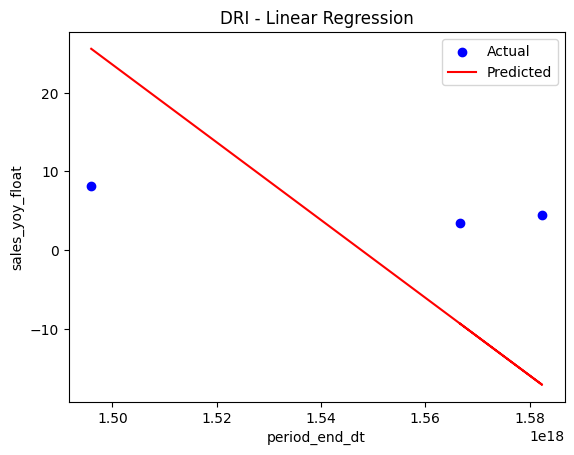

In [460]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
dt_dri = df[df['entity'] == "DRI"]
entities = dt_dri['entity'].unique()
for entity in entities:
    entity_data = dt_dri[dt_dri['entity'] == entity]
    X = entity_data['period_end_dt'].astype(int).values.reshape(-1, 1)
    y = entity_data['sales_yoy_float']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Entity: {entity}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mse}")
    print(f'Y_pred: {y_pred}')

    plt.figure()
    plt.scatter(X_test, y_test, color='b', label='Actual')
    plt.plot(X_test, y_pred, color='r', label='Predicted')
    plt.xlabel('period_end_dt')
    plt.ylabel('sales_yoy_float')
    plt.title(f'{entity} - Linear Regression')
    plt.legend()
    plt.show()

Entity: EAT
Coefficients: [-3.69254402e-18]
Intercept: 6.961095356256639
Mean Squared Error: 390.45178893513713
Y_pred: [1.07903226 1.13709677 1.3983871 ]


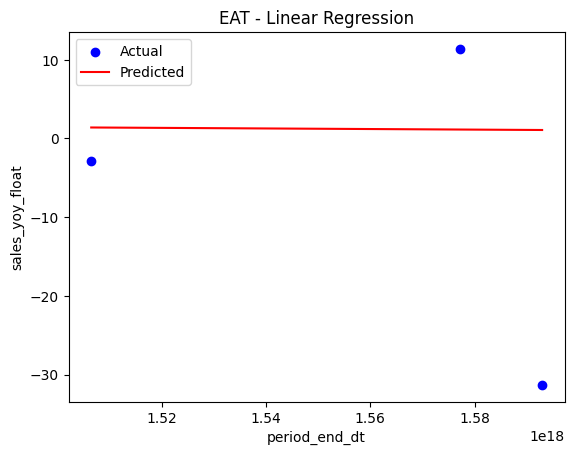

In [461]:
dt_eat = df[df['entity'] == "EAT"]
entities = dt_eat['entity'].unique()
for entity in entities:
    eat_entity_data = dt_eat[dt_eat['entity'] == entity]
    X = eat_entity_data['period_end_dt'].astype(int).values.reshape(-1, 1)
    y = eat_entity_data['sales_yoy_float']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Entity: {entity}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mse}")
    print(f'Y_pred: {y_pred}')

    plt.figure()
    plt.scatter(X_test, y_test, color='b', label='Actual')
    plt.plot(X_test, y_pred, color='r', label='Predicted')
    plt.xlabel('period_end_dt')
    plt.ylabel('sales_yoy_float')
    plt.title(f'{entity} - Linear Regression')
    plt.legend()
    plt.show()

Entity: TXRH
Coefficients: [-1.86892102e-16]
Intercept: 297.6565166941942
Mean Squared Error: 415.3810725299999
Y_pred: [-0.15141226  2.78742866 16.12524513]


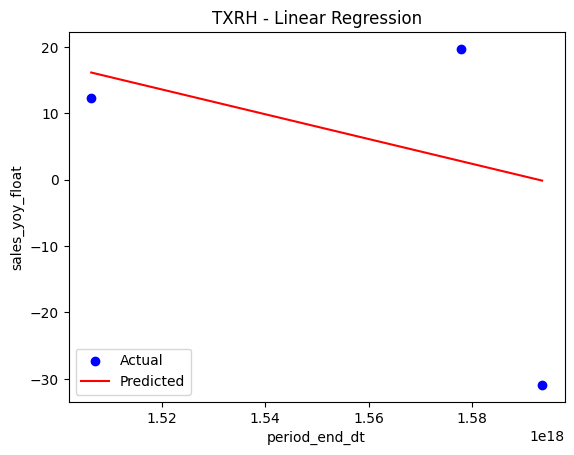

In [462]:
txrh = df[df['entity'] == "TXRH"]
entities = txrh['entity'].unique()
for entity in entities:
    entity_data = txrh[txrh['entity'] == entity]
    X = entity_data['period_end_dt'].astype(int).values.reshape(-1, 1)
    y = entity_data['sales_yoy_float']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Entity: {entity}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mse}")
    print(f'Y_pred: {y_pred}')
    plt.figure()
    plt.scatter(X_test, y_test, color='b', label='Actual')
    plt.plot(X_test, y_pred, color='r', label='Predicted')
    plt.xlabel('period_end_dt')
    plt.ylabel('sales_yoy_float')
    plt.title(f'{entity} - Linear Regression')
    plt.legend()
    plt.show()